
## Background

Nonlinear systems are fundamental in geochemical cycles, where feedback mechanisms
can lead to multiple equilibria, oscillations, or chaotic behavior. Unlike linear systems,
which have predictable responses, nonlinear systems exhibit a range of behaviors depending
on initial conditions and parameter values.

### Example: A Simple Nonlinear Carbon Cycle Model
One common nonlinear system is the CO₂ exchange model with saturation effects.
Here, we modify the exchange model from earlier chapters by introducing a nonlinear
dependence on CO₂ concentration.

The governing equation is:

$$
\frac{d(pCO_2)}{dt} = \frac{1 - pCO_2}{\tau} - k pCO_2^2
$$

where $ k $ introduces a nonlinear loss term, representing enhanced removal at higher concentrations.

We explore this system numerically using different methods.


<>:18: SyntaxWarning: invalid escape sequence '\['
<>:18: SyntaxWarning: invalid escape sequence '\['
C:\Users\hansof\AppData\Local\Temp\ipykernel_27788\3361159508.py:18: SyntaxWarning: invalid escape sequence '\['
  """


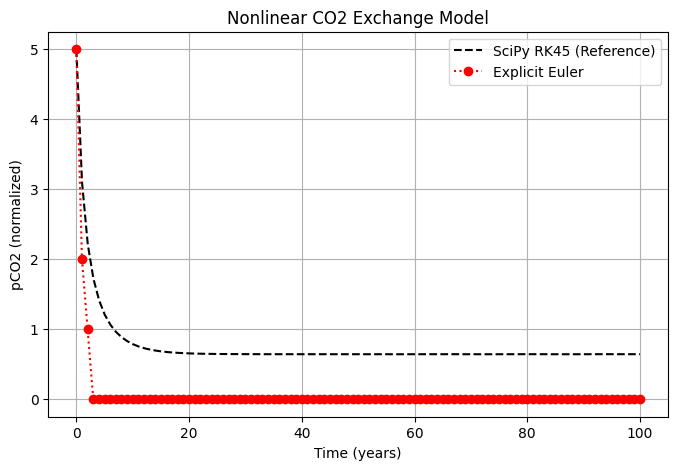

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


# Define the nonlinear CO2 exchange model
def nonlinear_co2_exchange(t, pco2, residence_time, k):
    return (1 - pco2) / residence_time - k * pco2**2

# Parameters
residence_time = 8.64  # years
k = 0.1  # Nonlinear removal coefficient
pco2_initial = 5  # Initial perturbation
time_span = (0, 100)  # Simulation from 0 to 100 years

# Explicit Euler Method
def explicit_euler(f, t0, y0, h, t_end, params):

    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros_like(t_values)
    y_values[0] = y0
    
    for i in range(1, len(t_values)):
        y_values[i] = y_values[i-1] + h * f(t_values[i-1], y_values[i-1], *params)
    
    return t_values, y_values

# Solve using SciPy's solve_ivp
sol = solve_ivp(nonlinear_co2_exchange, time_span, [pco2_initial], args=(residence_time, k), dense_output=True)
t_scipy = np.linspace(time_span[0], time_span[1], 100)
pco2_scipy = sol.sol(t_scipy)[0]

# Simulate using Explicit Euler
h = 1  # Step size
t_explicit, pco2_explicit = explicit_euler(nonlinear_co2_exchange, 0, pco2_initial, h, 100, (residence_time, k))

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(t_scipy, pco2_scipy, label='SciPy RK45 (Reference)', linestyle='dashed', color='black')
plt.plot(t_explicit, pco2_explicit, label='Explicit Euler', marker='o', linestyle='dotted', color='red')
plt.xlabel('Time (years)')
plt.ylabel('pCO2 (normalized)')
plt.title('Nonlinear CO2 Exchange Model')
plt.legend()
plt.grid()
plt.show()
